## Goal 3:
### Find which countries perform consistently well/badly in odds and well/badly in reality.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/esc.csv", sep=";")

data

,year,country,place,pts,tele,jury,qualified,odds_final,odds_qualify,semi_final,final_ro,semi_ro,artist,song,language
0,2022,Ukraine,1,631,439,192,1,1,1,1,12,6,Kalush Orchestra,Stefania (Стефанія),Ukrainian
1,2022,United Kingdom,2,466,183,283,1,4,0,0,22,0,Sam Ryder,Space Man,English
2,2022,Spain,3,459,228,231,1,3,0,0,10,0,Chanel,SloMo,"Spanish, English"
3,2022,Sweden,4,438,180,258,1,2,1,2,20,17,Cornelia Jakobs,Hold Me Closer,English
4,2022,Serbia,5,312,225,87,1,8,6,2,24,3,Konstrakta,In corpore sano,"Serbian, Latin"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2015,Portugal,36,19,16,23,0,0,16,2,0,7,Leonor Andrade,Há um mar que nos separa,Portuguese
283,2015,Iceland,37,14,21,15,0,0,9,2,0,12,Maria Olafs,Unbroken,English
284,2015,Finland,38,13,1,55,0,0,11,1,0,5,Pertti Kurikan Nimipäivät,Aina mun pitää,Finnish
285,2015,San Marino,39,11,16,6,0,0,17,2,0,3,Anita Simoncini and Michele Perniola,Chain of Lights,English


In [3]:
total_final_participants = 0
total_years = 0

for year in range(2015, 2023):
    if year == 2020:
        continue
    
    final_participants = len(data[(data["year"] == year) & (data["qualified"] == 1)])
    total_final_participants += final_participants
    total_years += 1
    
avg_participants = round(total_final_participants / total_years, 2) # 26

In [4]:
def coords_x(row):
    x = float((avg_participants - row["odds_final"]) / avg_participants) # ODDS
    return x - 0.5

def coords_y(row):
    y = float((avg_participants - row["place"]) / avg_participants) # REALITY
    return y - 0.5

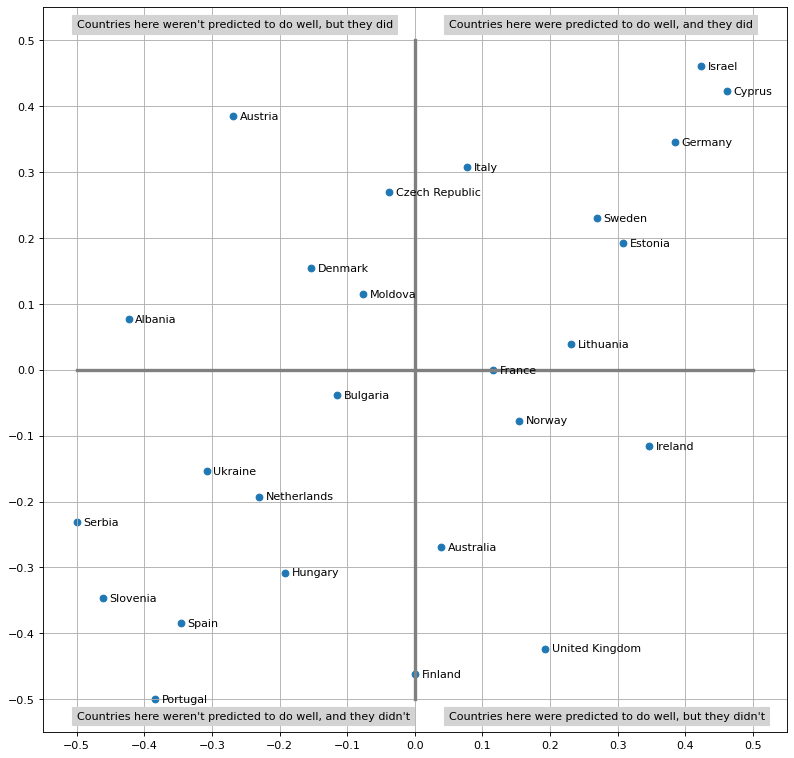

In [5]:
# PER YEAR PLOT: feel free to pick a year

# 2018 had a lot of incosistancies between odds & reality
# for example: Austria was predicted to be 20th, but actually came 3rd.

year = 2018
data_copy = data

data = data[(data["year"] == year) & data["qualified"] == 1]
data = data.assign(odds_x=data.apply(coords_x, axis = 1))
data = data.assign(reality_y=data.apply(coords_y, axis = 1))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)

x = list(data["odds_x"])
y = list(data["reality_y"])
n = list(data["country"])

plt.scatter(x, y)

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i] + 0.01, y[i] - 0.005))

plt.plot([-0.5, 0.5], [0, 0], color="gray", linewidth=3)
plt.plot([0, 0], [-0.5, 0.5], color="gray", linewidth=3)
    
plt.xticks(np.arange(-0.5, 0.51, 0.1))
plt.yticks(np.arange(-0.5, 0.51, 0.1))

# information
plt.text(-0.5, 0.52, "Countries here weren't predicted to do well, but they did", backgroundcolor="lightgray")
plt.text(0.05, 0.52, "Countries here were predicted to do well, and they did", backgroundcolor="lightgray")
plt.text(-0.5, -0.53, "Countries here weren't predicted to do well, and they didn't", backgroundcolor="lightgray")
plt.text(0.05, -0.53, "Countries here were predicted to do well, but they didn't", backgroundcolor="lightgray")

plt.grid()
plt.show()

data = data_copy

---

In [7]:
# averages for years 2015-2022 (excluding 2020 - no contest!)

countries = data["country"].unique().tolist()
odds_x = [0 for i in range(len(countries))]
reality_y = [0 for i in range(len(countries))]
q_count = [0 for i in range(len(countries))] # qualification count

In [8]:
data = data.drop(data[data["qualified"] == 0].index)

data = data.assign(odds_x=data.apply(coords_x, axis = 1))
data = data.assign(reality_y=data.apply(coords_y, axis = 1))

avg = data.filter(items=["country", "odds_x", "reality_y"])
avg = avg.groupby("country").mean()

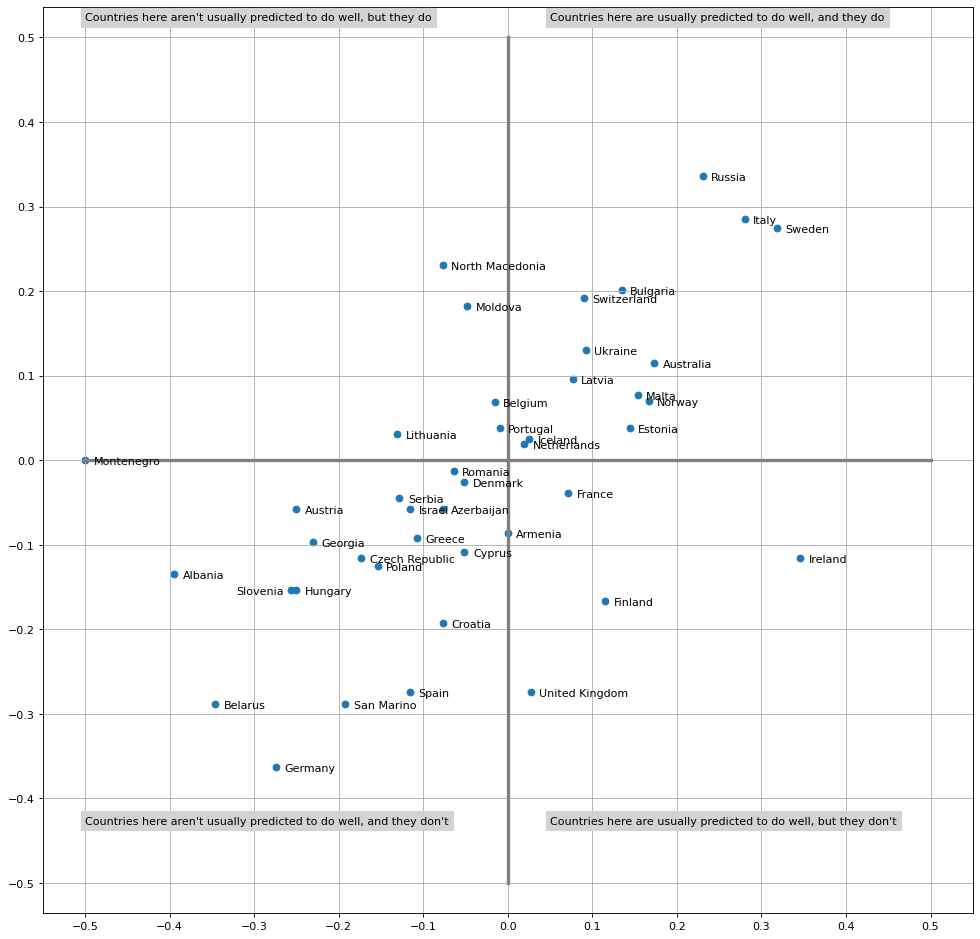

In [9]:
figure(figsize=(15, 15), dpi=80)

x = list(avg["odds_x"])
y = list(avg["reality_y"])

countries.sort()
countries.remove("Bosnia & Herzegovina") # never qualified
n = list(countries)

plt.scatter(x, y)

for i, txt in enumerate(n):
    if txt != "Slovenia":
        plt.annotate(txt, (x[i] + 0.01, y[i] - 0.005))
    else:
        plt.annotate(txt, (x[i] - 0.065, y[i] - 0.005))

plt.plot([-0.5, 0.5], [0, 0], color="gray", linewidth=3)
plt.plot([0, 0], [-0.5, 0.5], color="gray", linewidth=3)
    
plt.xticks(np.arange(-0.5, 0.51, 0.1))
plt.yticks(np.arange(-0.5, 0.51, 0.1))
plt.axis('equal')

# information per quadrant

# do well means do better than average ()
plt.text(-0.5, 0.52, "Countries here aren't usually predicted to do well, but they do", backgroundcolor="lightgray")
plt.text(0.05, 0.52, "Countries here are usually predicted to do well, and they do", backgroundcolor="lightgray")
plt.text(-0.5, -0.43, "Countries here aren't usually predicted to do well, and they don't", backgroundcolor="lightgray")
plt.text(0.05, -0.43, "Countries here are usually predicted to do well, but they don't", backgroundcolor="lightgray")

plt.grid()
plt.show()

---

### Finding surprise qualifiers

In [10]:
data = pd.read_csv("../data/esc.csv", sep=";")

# countries that weren't predicted to qualify, but they still did
qual = data[(data["qualified"] == 1) & (data["odds_qualify"] > 10)]

surprises = dict(qual["country"].value_counts())

print("The countries that qualified despite odds being against them are (during 2015-2022):")
for qualifier in surprises:
    print(f" - {qualifier} with {surprises[qualifier]} surprise qualification(s)")

The countries that qualified despite odds being against them are (during 2015-2022):
 - Serbia with 2 surprise qualification(s)
 - Albania with 2 surprise qualification(s)
 - Lithuania with 1 surprise qualification(s)
 - Georgia with 1 surprise qualification(s)
 - Austria with 1 surprise qualification(s)
 - Poland with 1 surprise qualification(s)
 - Norway with 1 surprise qualification(s)
 - Finland with 1 surprise qualification(s)
 - Slovenia with 1 surprise qualification(s)
 - Ireland with 1 surprise qualification(s)
 - Switzerland with 1 surprise qualification(s)
 - Belarus with 1 surprise qualification(s)
 - San Marino with 1 surprise qualification(s)
 - Israel with 1 surprise qualification(s)
 - Moldova with 1 surprise qualification(s)
 - Iceland with 1 surprise qualification(s)
 - Romania with 1 surprise qualification(s)
 - Montenegro with 1 surprise qualification(s)
